In [49]:
import polars as pl
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import seaborn as sns
from datetime import datetime as dt
from sklearn.cluster import KMeans

In [16]:
pl.Config.set_tbl_formatting()
# 1. Set Polars to show all rows
pl.Config.set_tbl_rows(-1)

# 2. Set Polars to show all columns
pl.Config.set_tbl_cols(-1)

polars.config.Config

In [3]:
df = pl.read_ndjson("data/internal.jsonl")

In [110]:
print(df.head())

shape: (5, 50)
┌─────┬─────┬─────┬─────┬─────┬─────┬─────┬─────┬─────┬─────┬─────┬─────┬─────┬─────┬─────┬─────┬─────┬─────┬─────┬─────┬─────┬─────┬─────┬─────┬─────┬─────┬─────┬─────┬─────┬─────┬─────┬─────┬─────┬─────┬─────┬─────┬─────┬─────┬─────┬─────┬─────┬─────┬─────┬─────┬─────┬─────┬─────┬─────┬─────┬─────┐
│ ser ┆ met ┆ eve ┆ age ┆ log ┆ @ti ┆ @ve ┆ use ┆ inp ┆ ecs ┆ htt ┆ att ┆ eve ┆ use ┆ sou ┆ sou ┆ sou ┆ age ┆ url ┆ des ┆ use ┆ log ┆ age ┆ use ┆ htt ┆ org ┆ ser ┆ des ┆ ser ┆ des ┆ ser ┆ age ┆ age ┆ use ┆ url ┆ sou ┆ htt ┆ tag ┆ use ┆ htt ┆ age ┆ eve ┆ htt ┆ cor ┆ url ┆ use ┆ eve ┆ sou ┆ url ┆ sou │
│ vic ┆ ric ┆ nt. ┆ nt. ┆ .of ┆ mes ┆ rsi ┆ r_a ┆ ut. ┆ .ve ┆ p.r ┆ ack ┆ nt. ┆ r_a ┆ rce ┆ rce ┆ rce ┆ nt. ┆ .co ┆ tin ┆ r_a ┆ .fi ┆ nt. ┆ r_a ┆ p.r ┆ ani ┆ vic ┆ tin ┆ vic ┆ tin ┆ vic ┆ nt. ┆ nt. ┆ r_a ┆ .fi ┆ rce ┆ p.r ┆ s   ┆ r_a ┆ p.r ┆ nt. ┆ nt. ┆ p.v ┆ rel ┆ .pa ┆ r_a ┆ nt. ┆ rce ┆ .or ┆ rce │
│ e.g ┆ s   ┆ dat ┆ id  ┆ fse ┆ tam ┆ on  ┆ gen ┆ typ ┆ rsi ┆ equ ┆ --- ┆ cre ┆

In [5]:
df.columns

['service.group.name',
 'metrics',
 'event.dataset',
 'agent.id',
 'log.offset',
 '@timestamp',
 '@version',
 'user_agent.original',
 'input.type',
 'ecs.version',
 'http.request.method',
 'attack',
 'event.created',
 'user_agent.name',
 'source.as',
 'source.registered_domain',
 'source.geo',
 'agent.hostname',
 'url.controller',
 'destination.geo',
 'user_agent.os.device.name',
 'log.file.path',
 'agent.type',
 'user_agent.os.platform',
 'http.response.status_code',
 'organization.name',
 'service.type',
 'destination.as',
 'service.group.id',
 'destination.ip',
 'service.name',
 'agent.version',
 'agent.name',
 'user_agent.description',
 'url.filetype',
 'source.domain',
 'http.response.status',
 'tags',
 'user_agent.category',
 'http.response.bytes',
 'agent.ephemeral_id',
 'event.module',
 'http.version',
 'correlation',
 'url.path',
 'user_agent.version',
 'event.blocked',
 'source.ip',
 'url.original',
 'source.network']

In [6]:
df["attack"].describe()

statistic,value
str,f64
"""count""",691303.0
"""null_count""",202.0


In [7]:
df.select([
    pl.col(c).is_null().sum().alias(c)
    for c in df.columns
])

service.group.name,metrics,event.dataset,agent.id,log.offset,@timestamp,@version,user_agent.original,input.type,ecs.version,http.request.method,attack,event.created,user_agent.name,source.as,source.registered_domain,source.geo,agent.hostname,url.controller,destination.geo,user_agent.os.device.name,log.file.path,agent.type,user_agent.os.platform,http.response.status_code,organization.name,service.type,destination.as,service.group.id,destination.ip,service.name,agent.version,agent.name,user_agent.description,url.filetype,source.domain,http.response.status,tags,user_agent.category,http.response.bytes,agent.ephemeral_id,event.module,http.version,correlation,url.path,user_agent.version,event.blocked,source.ip,url.original,source.network
u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32
0,0,0,0,0,0,0,226,0,0,0,202,0,226,0,100231,0,0,0,6873,226,0,0,226,0,0,0,6873,0,6873,0,0,6873,15050,0,48114,0,0,226,0,0,0,0,0,0,206771,0,0,0,458575


In [8]:
df.shape

(691505, 50)

In [9]:
for c in df.columns:
    # Skip columns with no nulls
    if not df.select(pl.col(c).is_null().any()).item():
        continue

    dtype = df.schema[c]
    print(f"\nColumn: {c} (dtype: {dtype})")

    try:
        # Try to show sorted unique values
        uniques = df.select(pl.col(c).unique().sort()).to_series().to_list()
        print(uniques)
    except Exception as e:
        print(f"  [Skipped: {e}]")



Column: user_agent.original (dtype: String)
[None, '(compatible;PetalBot;+https://aspiegel.com/petalbot)', 'AdsBot-Google (+http://www.google.com/adsbot.html)', 'Apache-HttpClient/4.5.2 (Java/1.8.0_161)', 'Go-http-client/1.1', 'Mozilla/4.0 (compatible; MSIE 6.0; Windows NT 5.1; SV1)', 'Mozilla/4.0 (compatible; MSIE 8.0; Windows NT 5.1; Trident/4.0)', 'Mozilla/4.0 (compatible; MSIE 8.0; Windows NT 6.0; Trident/4.0)', 'Mozilla/5.0 (Linux; Android 10; Mi 9T Pro) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/87.0.4280.101 Mobile Safari/537.36', 'Mozilla/5.0 (Linux; Android 6.0.1; Nexus 5X Build/MMB29P) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/87.0.4280.90 Mobile Safari/537.36 (compatible; Googlebot/2.1; +http://www.google.com/bot.html)', 'Mozilla/5.0 (Linux; Android 7.0;) AppleWebKit/537.36 (KHTML, like Gecko) Mobile Safari/537.36 (compatible; PetalBot;+https://aspiegel.com/petalbot)', 'Mozilla/5.0 (Linux; U; Android 4.3; en-us; SM-N900T Build/JSS15J) AppleWebKit/534.30 (KHTML, like 

In [10]:
# df = df.drop("attack")

In [17]:
unique_counts = df.select([
    pl.col(c).n_unique().alias(c)
    for c in df.columns
])
print(unique_counts)

shape: (1, 50)
┌─────┬─────┬─────┬─────┬─────┬─────┬─────┬─────┬─────┬─────┬─────┬─────┬─────┬─────┬─────┬─────┬─────┬─────┬─────┬─────┬─────┬─────┬─────┬─────┬─────┬─────┬─────┬─────┬─────┬─────┬─────┬─────┬─────┬─────┬─────┬─────┬─────┬─────┬─────┬─────┬─────┬─────┬─────┬─────┬─────┬─────┬─────┬─────┬─────┬─────┐
│ ser ┆ met ┆ eve ┆ age ┆ log ┆ @ti ┆ @ve ┆ use ┆ inp ┆ ecs ┆ htt ┆ att ┆ eve ┆ use ┆ sou ┆ sou ┆ sou ┆ age ┆ url ┆ des ┆ use ┆ log ┆ age ┆ use ┆ htt ┆ org ┆ ser ┆ des ┆ ser ┆ des ┆ ser ┆ age ┆ age ┆ use ┆ url ┆ sou ┆ htt ┆ tag ┆ use ┆ htt ┆ age ┆ eve ┆ htt ┆ cor ┆ url ┆ use ┆ eve ┆ sou ┆ url ┆ sou │
│ vic ┆ ric ┆ nt. ┆ nt. ┆ .of ┆ mes ┆ rsi ┆ r_a ┆ ut. ┆ .ve ┆ p.r ┆ ack ┆ nt. ┆ r_a ┆ rce ┆ rce ┆ rce ┆ nt. ┆ .co ┆ tin ┆ r_a ┆ .fi ┆ nt. ┆ r_a ┆ p.r ┆ ani ┆ vic ┆ tin ┆ vic ┆ tin ┆ vic ┆ nt. ┆ nt. ┆ r_a ┆ .fi ┆ rce ┆ p.r ┆ s   ┆ r_a ┆ p.r ┆ nt. ┆ nt. ┆ p.v ┆ rel ┆ .pa ┆ r_a ┆ nt. ┆ rce ┆ .or ┆ rce │
│ e.g ┆ s   ┆ dat ┆ id  ┆ fse ┆ tam ┆ on  ┆ gen ┆ typ ┆ rsi ┆ equ ┆ --- ┆ cre ┆

In [12]:
unique_counts.to_pandas()

,service.group.name,metrics,event.dataset,agent.id,log.offset,@timestamp,@version,user_agent.original,input.type,ecs.version,...,agent.ephemeral_id,event.module,http.version,correlation,url.path,user_agent.version,event.blocked,source.ip,url.original,source.network
0,1,690391,1,2,687538,387008,1,175,1,2,...,2,1,3,44,3600,59,1,617,4831,28


In [14]:
cols_with_one_unique = (
    unique_counts.unpivot()
    .filter(pl.col("value") == 1)
    .select("variable")
    .to_series()
    .to_list()
)

print(cols_with_one_unique)

['service.group.name', 'event.dataset', '@version', 'input.type', 'agent.type', 'organization.name', 'service.group.id', 'event.module', 'event.blocked']


In [15]:
df_cleaned = df.drop(cols_with_one_unique)
df_cleaned.shape

(691505, 41)

In [26]:
df_cleaned["@timestamp"][0]

'2020-12-21T09:29:52.000Z'

In [28]:
df_cleaned = df_cleaned.with_columns(
    pl.col("@timestamp").str.to_datetime(time_zone="UTC").alias("timestamp")
).drop("@timestamp")

In [34]:
daily_counts = (
    df_cleaned.group_by(
        # Extract the full date (YYYY-MM-DD)
        pl.col("timestamp").dt.date().alias("date")
    )
    .len() 
    .sort("date")
)

print(daily_counts)

shape: (7, 2)
┌────────────┬────────┐
│ date       ┆ len    │
│ ---        ┆ ---    │
│ date       ┆ u32    │
╞════════════╪════════╡
│ 2020-12-21 ┆ 101594 │
│ 2020-12-22 ┆ 106777 │
│ 2020-12-23 ┆ 102568 │
│ 2020-12-24 ┆ 99776  │
│ 2020-12-25 ┆ 93493  │
│ 2020-12-26 ┆ 94011  │
│ 2020-12-27 ┆ 93286  │
└────────────┴────────┘


In [ ]:
df_agg = (
    df_cleaned.group_by(
        pl.col("timestamp").dt.date().cast(pl.String).alias("day"),
        pl.col("timestamp").dt.truncate("5m").dt.time().alias("time_bin")
    )
    .len()  # Get the count of requests
    .sort("day", "time_bin") # Sort for a clean line plot
)

In [128]:
df_agg.head(3)

day,time_bin,len
str,time,u32
"""2020-12-21""",00:00:00,354
"""2020-12-21""",00:05:00,354
"""2020-12-21""",00:10:00,352


Plot saved as 'daily_request_5min_line_plot.png'


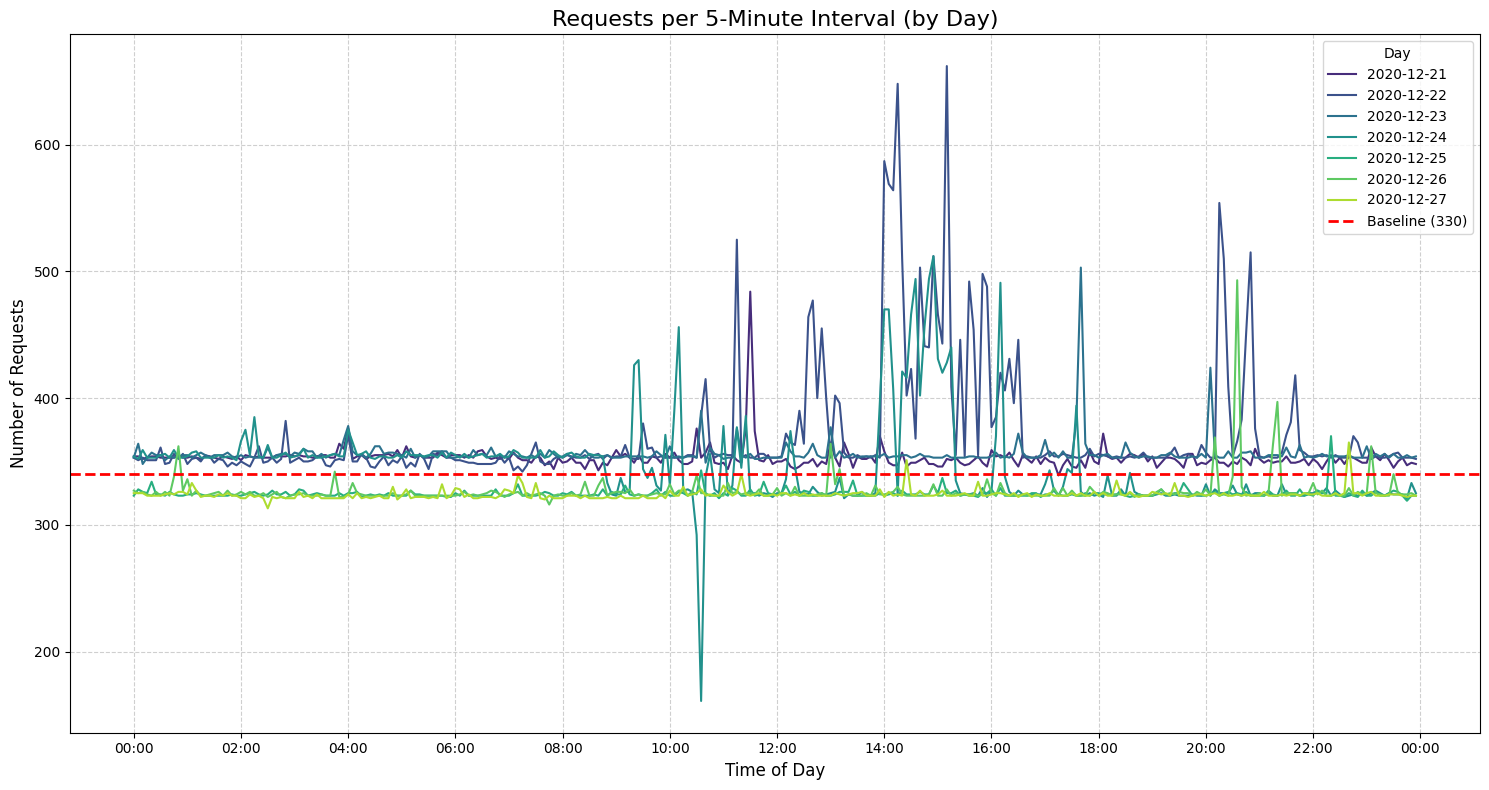

In [ ]:
df_pd = df_agg.to_pandas()
dummy_date = dt.date(dt.now())
df_pd['plot_time'] = df_pd['time_bin'].apply(lambda t: dt.combine(dummy_date, t))

plt.figure(figsize=(15, 8))

sns.lineplot(
    data=df_pd,
    x="plot_time",
    y="len",
    hue="day",        # This creates the 7 lines
    palette="viridis",
    linewidth=1.5
)

plt.title('Requests per 5-Minute Interval (by Day)', fontsize=16)
plt.xlabel('Time of Day', fontsize=12)
plt.ylabel('Number of Requests', fontsize=12)


ax = plt.gca()
ax.axhline(y=340, color='red', linestyle='--', linewidth=2, label='Baseline (330)')
ax.xaxis.set_major_formatter(mdates.DateFormatter('%H:%M'))
ax.xaxis.set_major_locator(mdates.HourLocator(interval=2))

plt.grid(axis='both', linestyle='--', alpha=0.6)
plt.legend(title='Day')

plt.tight_layout()
plt.savefig("plots/daily_request_5min_line_plot.png")

print("Plot saved as 'daily_request_5min_line_plot.png'")

Plot saved as 'daily_request_grid.png'


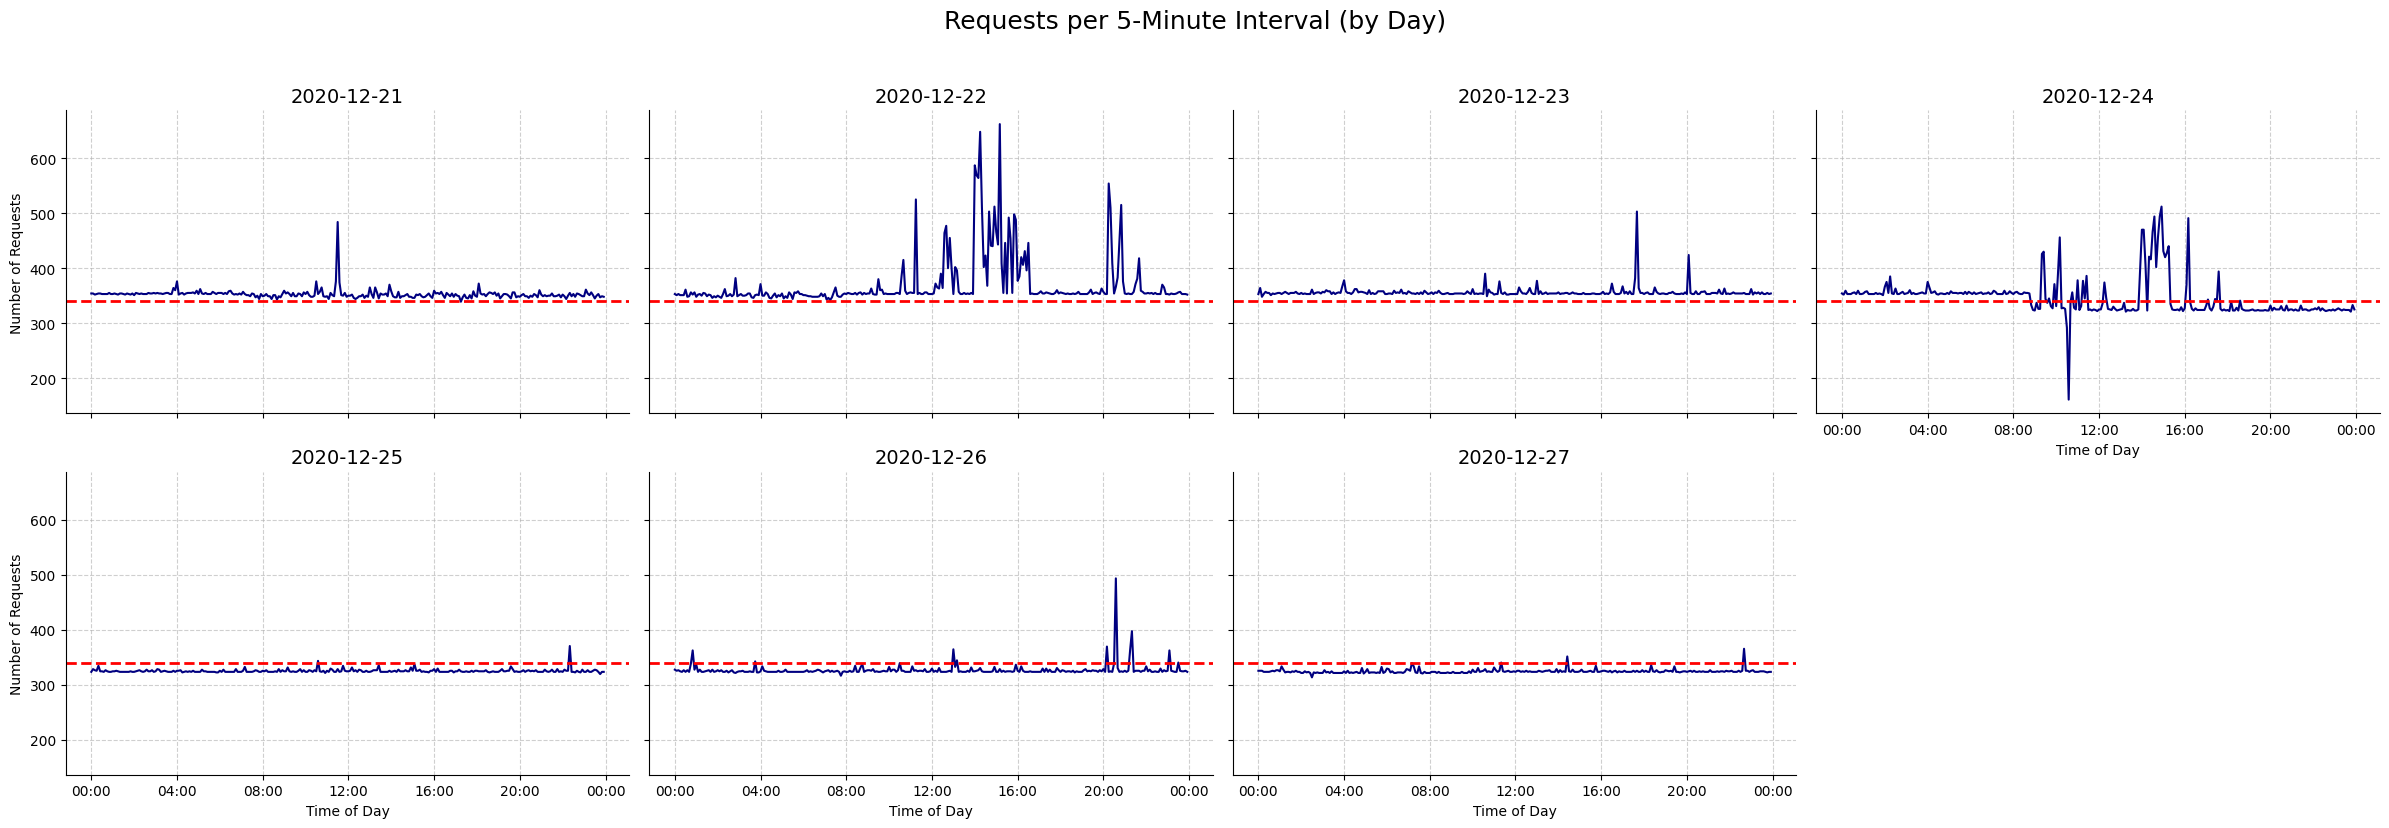

In [ ]:
# (Assuming df_agg is defined in your environment)
df_pd = df_agg.to_pandas()
dummy_date = dt.date(dt.now())
df_pd['plot_time'] = df_pd['time_bin'].apply(lambda t: dt.combine(dummy_date, t))

# --- MODIFIED BLOCK ---

# 1. Create a FacetGrid, making one column for each 'day'
#    col_wrap=4 tells it to wrap to the next row after 4 plots
g = sns.FacetGrid(
    df_pd, 
    col="day", 
    col_wrap=4,  # Wraps grid into rows (4 plots on top, 3 on bottom)
    height=4,    # Height of each plot
    aspect=1.5   # Aspect ratio of each plot
)

# 2. Map the line plot onto each subplot in the grid
g.map(sns.lineplot, "plot_time", "len", color="navy", linewidth=1.5)

# 3. Map the horizontal baseline onto each subplot
g.map(plt.axhline, y=340, color='red', linestyle='--', linewidth=2)

# 4. Format the axes for readability
# (Set titles, labels, and format the x-axis time)
g.set_titles(col_template="{col_name}", size=14)
g.set_axis_labels("Time of Day", "Number of Requests")

# Iterate over each subplot's axis to set formatters and grids
for ax in g.axes.flat:
    # Set the x-axis formatter and locator
    ax.xaxis.set_major_formatter(mdates.DateFormatter('%H:%M'))
    ax.xaxis.set_major_locator(mdates.HourLocator(interval=4)) # Ticks every 4 hours
    
    # Add gridlines
    ax.grid(axis='both', linestyle='--', alpha=0.6)

# 5. Add an overall title and save the figure
plt.suptitle('Requests per 5-Minute Interval (by Day)', fontsize=18, y=1.03)
plt.tight_layout()
plt.savefig("daily_request_grid.png")

# --- END MODIFIED BLOCK ---

print("Plot saved as 'daily_request_grid.png'")

In [59]:
low_traffic_bins = df_agg.filter(
    pl.col("len") < 300
)

In [ ]:
low_traffic_bins
# possible attack 24 - servers down

day,time_bin,len
str,time,u32
"""2020-12-24""",10:30:00,292
"""2020-12-24""",10:35:00,161


In [ ]:
daily_median_stats = df_agg.group_by("day").agg(
    pl.col("len").median().alias("median_requests_per_5min")
).with_columns(
    # Add day of the week for context
    pl.col("day").str.to_date().dt.strftime("%A").alias("day_of_week")
).sort("day")
daily_median_stats
# Mon - Thursday traffic higher but Fri-Sun lower

day,median_requests_per_5min,day_of_week
str,f64,str
"""2020-12-21""",353.0,"""Monday"""
"""2020-12-22""",354.0,"""Tuesday"""
"""2020-12-23""",354.0,"""Wednesday"""
"""2020-12-24""",338.5,"""Thursday"""
"""2020-12-25""",324.0,"""Friday"""
"""2020-12-26""",324.0,"""Saturday"""
"""2020-12-27""",323.0,"""Sunday"""


Generating new line plot...
Plot saved as 'mon-thu_vs_fri-sun_plot.png'


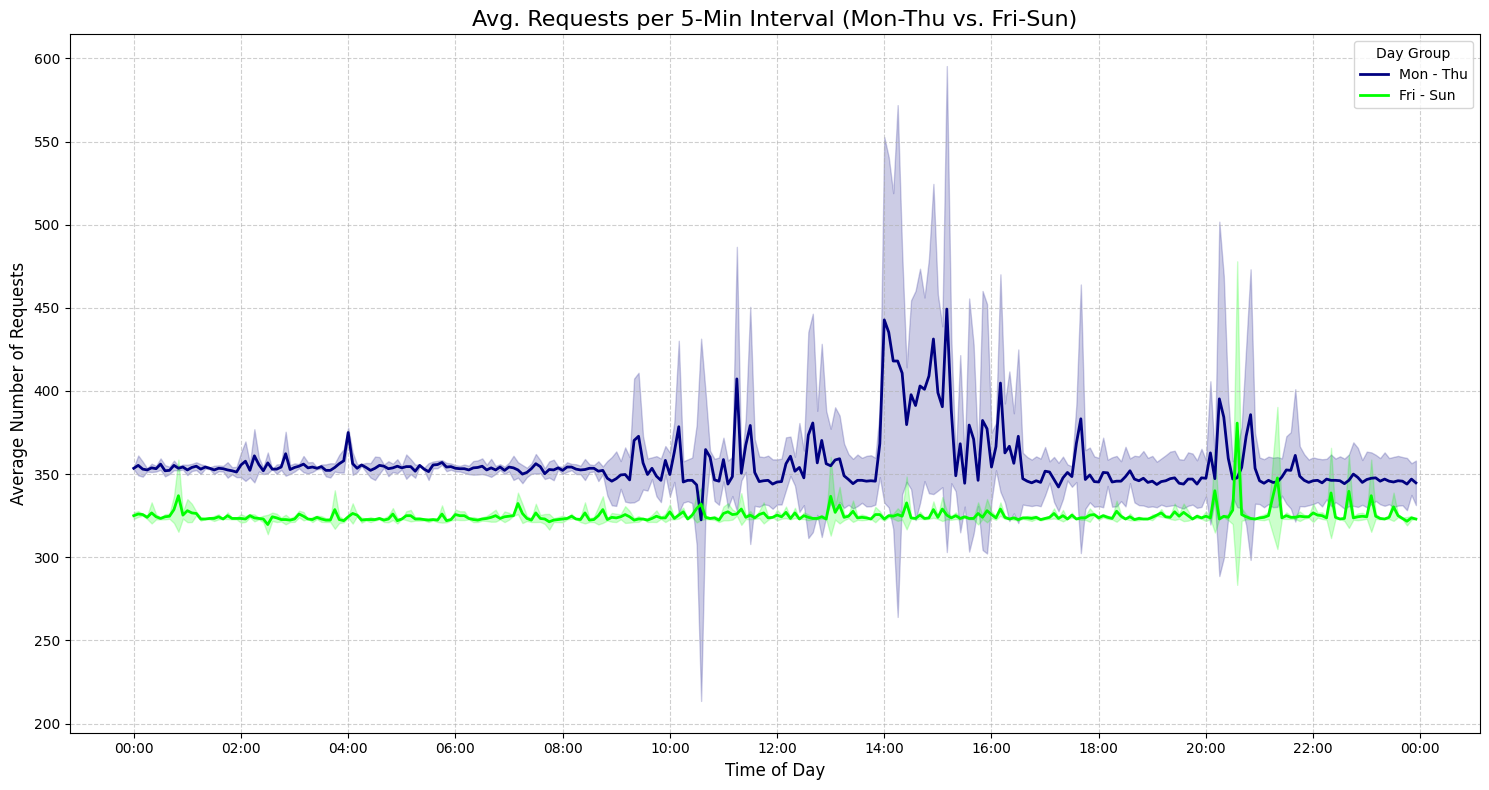

In [ ]:
df_with_daygroup = df_agg.with_columns(
    # Convert 'day' string back to date object to get weekday
    pl.col("day").str.to_date()
).with_columns(
    # Create the new category. Polars weekday() is 1=Mon, 7=Sun.
    
    # --- THIS IS THE MODIFIED BLOCK ---
    pl.when(pl.col("day").dt.weekday().is_in([5, 6, 7])) # 5=Fri, 6=Sat, 7=Sun
    .then(pl.lit("Fri - Sun"))
    .otherwise(pl.lit("Mon - Thu"))
    .alias("day_group")
    # --- END MODIFIED BLOCK ---
)

df_pd = df_with_daygroup.to_pandas()

# --- 4. Apply Plotting Fix ---
dummy_date = dt.date(dt.now())
df_pd['plot_time'] = df_pd['time_bin'].apply(lambda t: dt.combine(dummy_date, t))

# --- 5. Plotting with Seaborn ---
print("Generating new line plot...")

plt.figure(figsize=(15, 8))

sns.lineplot(
    data=df_pd,
    x="plot_time",
    y="len",
    hue="day_group",    # Use the new 'day_group' column
    errorbar="sd",        # Show standard deviation
    palette={"Mon - Thu": "navy", "Fri - Sun": "lime"}, # Update palette labels
    linewidth=2
)

# --- 6. Customize and Save ---
plt.title('Avg. Requests per 5-Min Interval (Mon-Thu vs. Fri-Sun)', fontsize=16) # Updated title
plt.xlabel('Time of Day', fontsize=12)
plt.ylabel('Average Number of Requests', fontsize=12)

ax = plt.gca()
ax.xaxis.set_major_formatter(mdates.DateFormatter('%H:%M'))
ax.xaxis.set_major_locator(mdates.HourLocator(interval=2))

plt.grid(axis='both', linestyle='--', alpha=0.6)
plt.legend(title='Day Group') # Updated legend title

plt.tight_layout()
plt.savefig("plots/mon-thu_vs_fri-sun_plot.png") # Updated filename

print("Plot saved as 'mon-thu_vs_fri-sun_plot.png'")

## Analysis for 2 groups

In [69]:
df_grouped_agg = df_agg.with_columns(
    pl.col("day").str.to_date()  # Convert back to date object
).with_columns(
    # Create the new category. Polars weekday() is 1=Mon, 7=Sun.
    pl.when(pl.col("day").dt.weekday().is_in([5, 6, 7])) # 5=Fri, 6=Sat, 7=Sun
    .then(pl.lit(1))
    .otherwise(pl.lit(0))
    .alias("weekend")
)

In [71]:
df_grouped_agg.head()

day,time_bin,len,weekend
date,time,u32,i32
2020-12-21,00:00:00,354,0
2020-12-21,00:05:00,354,0
2020-12-21,00:10:00,352,0
2020-12-21,00:15:00,353,0
2020-12-21,00:20:00,354,0


In [92]:
# stats_iqr = df_grouped_agg.group_by("weekend").agg(
#     pl.col("len").quantile(0.25).alias("Q1"),
#     pl.col("len").quantile(0.75).alias("Q3")
# ).with_columns(
#     (pl.col("Q3") - pl.col("Q1")).alias("IQR")
# ).with_columns(
#     (pl.col("Q3") + 1.5 * pl.col("IQR")).alias("upper_bound")
# )

# print("--- IQR Stats ---")
# print(stats_iqr)

# # 2. Join the stats back to the main data
# df_with_stats = df_grouped_agg.join(
#     stats_iqr.select(["weekend", "upper_bound"]), 
#     on="weekend"
# )

# # # 3. Filter for outliers
# outliers_iqr = df_with_stats.filter(
#     pl.col("len") > pl.col("upper_bound")
# ).sort("len", descending=True)

# print(f"\nFound {len(outliers_iqr)} outliers using IQR.")
# print(outliers_iqr.head())

In [91]:
# df_pd_outliers = outliers_iqr.to_pandas()

# # --- 2. Apply Plotting Fix ---
# # Combine time_bin with a dummy date
# dummy_date = dt.date(dt.now())
# df_pd_outliers['plot_time'] = df_pd_outliers['time_bin'].apply(lambda t: dt.combine(dummy_date, t))

# # --- 3. Plotting with Seaborn ---
# print("Generating outlier scatterplot...")

# plt.figure(figsize=(15, 8))

# sns.scatterplot(
#     data=df_pd_outliers,
#     x="plot_time",
#     y="len",
#     hue="weekend",    # Color points by 'Mon-Thu' or 'Fri-Sun'
#     palette={0: "navy", 1: "lime"}, # Match previous plot
#     s=100,              # Set dot size
#     alpha=0.7           # Set transparency
# )

# # --- 4. Customize and Save ---
# plt.title('Outlier Requests (Spikes) by Time of Day', fontsize=16)
# plt.xlabel('Time of Day', fontsize=12)
# plt.ylabel('Number of Requests', fontsize=12)

# # Format the x-axis to show time as "HH:MM"
# ax = plt.gca()
# ax.xaxis.set_major_formatter(mdates.DateFormatter('%H:%M'))
# ax.xaxis.set_major_locator(mdates.HourLocator(interval=2))

# plt.grid(axis='both', linestyle='--', alpha=0.6)
# plt.legend(title='Day Group')

# plt.tight_layout()
# plt.savefig("outlier_scatterplot.png")

# print("Plot saved as 'outlier_scatterplot.png'")
# print("Plot saved as 'mon-thu_vs_fri-sun_plot.png'")

In [89]:
# 1. Calculate the mean and std dev for each group
stats_zscore = df_grouped_agg.group_by("weekend").agg(
    pl.col("len").mean().alias("mean"),
    pl.col("len").std().alias("std_dev")
)

print("--- Z-score Stats ---")
print(stats_zscore)

# 2. Join stats back and calculate Z-score for each 5-min bin
df_with_zscore = df_grouped_agg.join(stats_zscore, on="weekend").with_columns(
    ((pl.col("len") - pl.col("mean")) / pl.col("std_dev")).alias("z_score")
)

# 3. Filter for outliers (a Z-score > 3 is a common threshold)
outliers_zscore = df_with_zscore.filter(
    (pl.col("z_score") > 3.0) | (pl.col("z_score") < -3.0)
).sort("z_score", descending=True)

print(f"\nFound {len(outliers_zscore)} outliers using Z-score > 3.")
print(outliers_zscore.head())

--- Z-score Stats ---
shape: (2, 3)
┌─────────┬────────────┬───────────┐
│ weekend ┆ mean       ┆ std_dev   │
│ ---     ┆ ---        ┆ ---       │
│ i32     ┆ f64        ┆ f64       │
╞═════════╪════════════╪═══════════╡
│ 0       ┆ 356.523438 ┆ 31.615431 │
│ 1       ┆ 324.988426 ┆ 7.846284  │
└─────────┴────────────┴───────────┘

Found 42 outliers using Z-score > 3.
shape: (5, 7)
┌────────────┬──────────┬─────┬─────────┬────────────┬───────────┬───────────┐
│ day        ┆ time_bin ┆ len ┆ weekend ┆ mean       ┆ std_dev   ┆ z_score   │
│ ---        ┆ ---      ┆ --- ┆ ---     ┆ ---        ┆ ---       ┆ ---       │
│ date       ┆ time     ┆ u32 ┆ i32     ┆ f64        ┆ f64       ┆ f64       │
╞════════════╪══════════╪═════╪═════════╪════════════╪═══════════╪═══════════╡
│ 2020-12-26 ┆ 20:35:00 ┆ 493 ┆ 1       ┆ 324.988426 ┆ 7.846284  ┆ 21.412884 │
│ 2020-12-22 ┆ 15:10:00 ┆ 662 ┆ 0       ┆ 356.523438 ┆ 31.615431 ┆ 9.662261  │
│ 2020-12-22 ┆ 14:15:00 ┆ 648 ┆ 0       ┆ 356.523438 ┆ 31.61543

Generating outlier scatterplot...
Plot saved as 'outlier_scatterplot.png'
Plot saved as 'mon-thu_vs_fri-sun_plot.png'


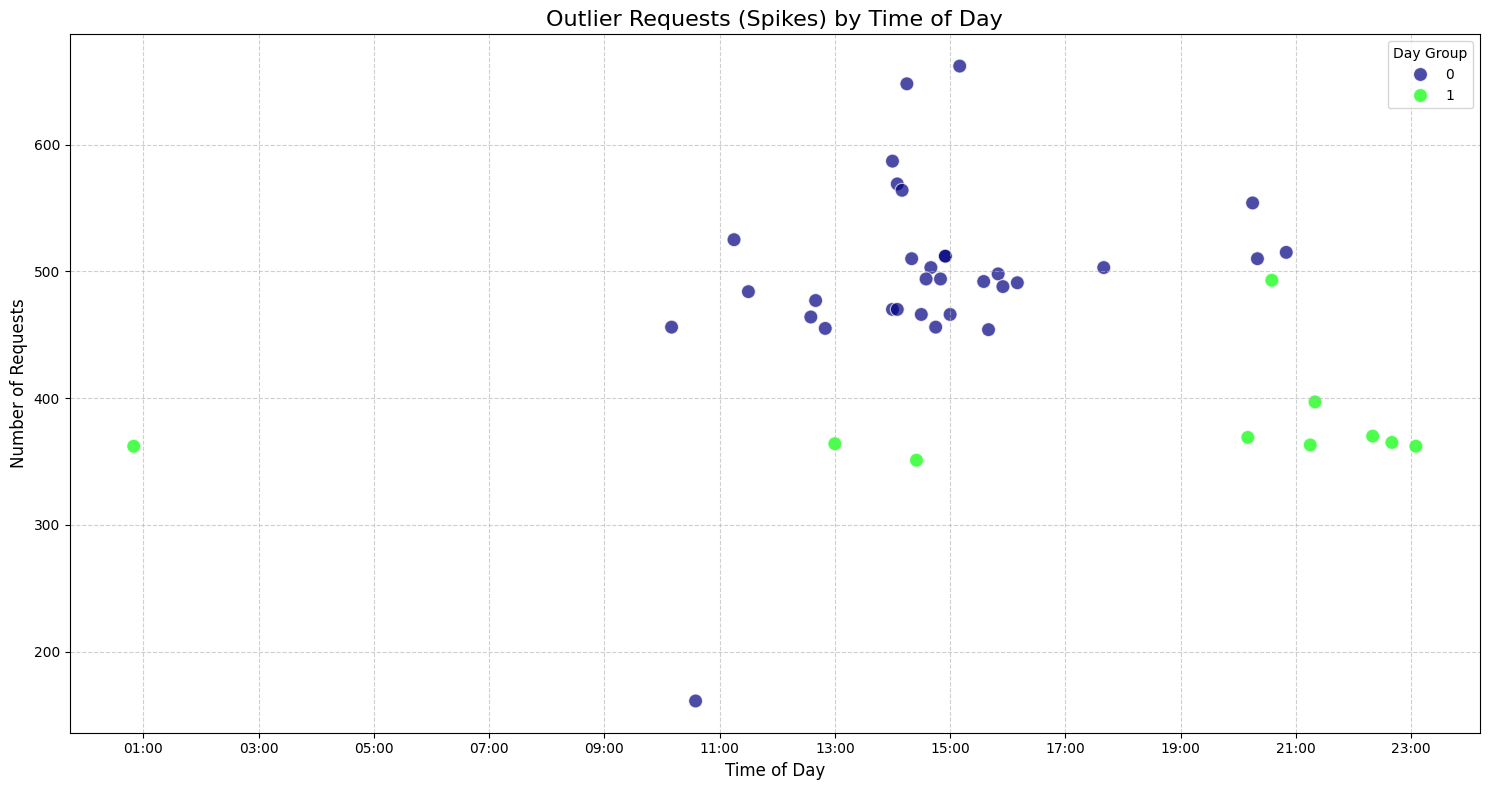

In [90]:
df_pd_outliers = outliers_zscore.to_pandas()

# --- 2. Apply Plotting Fix ---
# Combine time_bin with a dummy date
dummy_date = dt.date(dt.now())
df_pd_outliers['plot_time'] = df_pd_outliers['time_bin'].apply(lambda t: dt.combine(dummy_date, t))

# --- 3. Plotting with Seaborn ---
print("Generating outlier scatterplot...")

plt.figure(figsize=(15, 8))

sns.scatterplot(
    data=df_pd_outliers,
    x="plot_time",
    y="len",
    hue="weekend",    # Color points by 'Mon-Thu' or 'Fri-Sun'
    palette={0: "navy", 1: "lime"}, # Match previous plot
    s=100,              # Set dot size
    alpha=0.7           # Set transparency
)

# --- 4. Customize and Save ---
plt.title('Outlier Requests (Spikes) by Time of Day', fontsize=16)
plt.xlabel('Time of Day', fontsize=12)
plt.ylabel('Number of Requests', fontsize=12)

# Format the x-axis to show time as "HH:MM"
ax = plt.gca()
ax.xaxis.set_major_formatter(mdates.DateFormatter('%H:%M'))
ax.xaxis.set_major_locator(mdates.HourLocator(interval=2))

plt.grid(axis='both', linestyle='--', alpha=0.6)
plt.legend(title='Day Group')

plt.tight_layout()
plt.savefig("outlier_scatterplot.png")

print("Plot saved as 'outlier_scatterplot.png'")
print("Plot saved as 'mon-thu_vs_fri-sun_plot.png'")

In [98]:
# 1. Calculate a rolling median (baseline) for each day
# We'll use a 1,5-hour window (18 * 5-min bins)
# We use .over("day") to calculate the rolling window separately for each day
window_size = 12 
df_with_rolling = df_grouped_agg.with_columns(
    pl.col("len").rolling_median(
        window_size=window_size, 
        center=True, # Center the window for a smoother baseline
        min_samples=1
    ).over("day").alias("baseline") # 'over' is like a group_by for window functions
)

# 2. Find outliers based on deviation from this dynamic baseline
# We'll look for points that are, for example, 50% larger than the baseline
threshold_pct = 0.30  # 50%

outliers_rolling = df_with_rolling.filter(
    ((pl.col("len") - pl.col("baseline")) / pl.col("baseline") > threshold_pct) | (pl.col("len") < pl.col("baseline") * (1 - threshold_pct))
).sort("len", descending=True)

print(f"\nFound {len(outliers_rolling)} outliers using {threshold_pct:.0%} deviation from rolling baseline.")
print(outliers_rolling.head())


Found 16 outliers using 30% deviation from rolling baseline.
shape: (5, 5)
┌────────────┬──────────┬─────┬─────────┬──────────┐
│ day        ┆ time_bin ┆ len ┆ weekend ┆ baseline │
│ ---        ┆ ---      ┆ --- ┆ ---     ┆ ---      │
│ date       ┆ time     ┆ u32 ┆ i32     ┆ f64      │
╞════════════╪══════════╪═════╪═════════╪══════════╡
│ 2020-12-22 ┆ 15:10:00 ┆ 662 ┆ 0       ┆ 444.5    │
│ 2020-12-22 ┆ 14:15:00 ┆ 648 ┆ 0       ┆ 463.0    │
│ 2020-12-22 ┆ 14:00:00 ┆ 587 ┆ 0       ┆ 378.5    │
│ 2020-12-22 ┆ 14:05:00 ┆ 569 ┆ 0       ┆ 412.5    │
│ 2020-12-22 ┆ 14:10:00 ┆ 564 ┆ 0       ┆ 412.5    │
└────────────┴──────────┴─────┴─────────┴──────────┘


Generating outlier scatterplot...
Plot saved as 'outlier_scatterplot.png'
Plot saved as 'mon-thu_vs_fri-sun_plot.png'


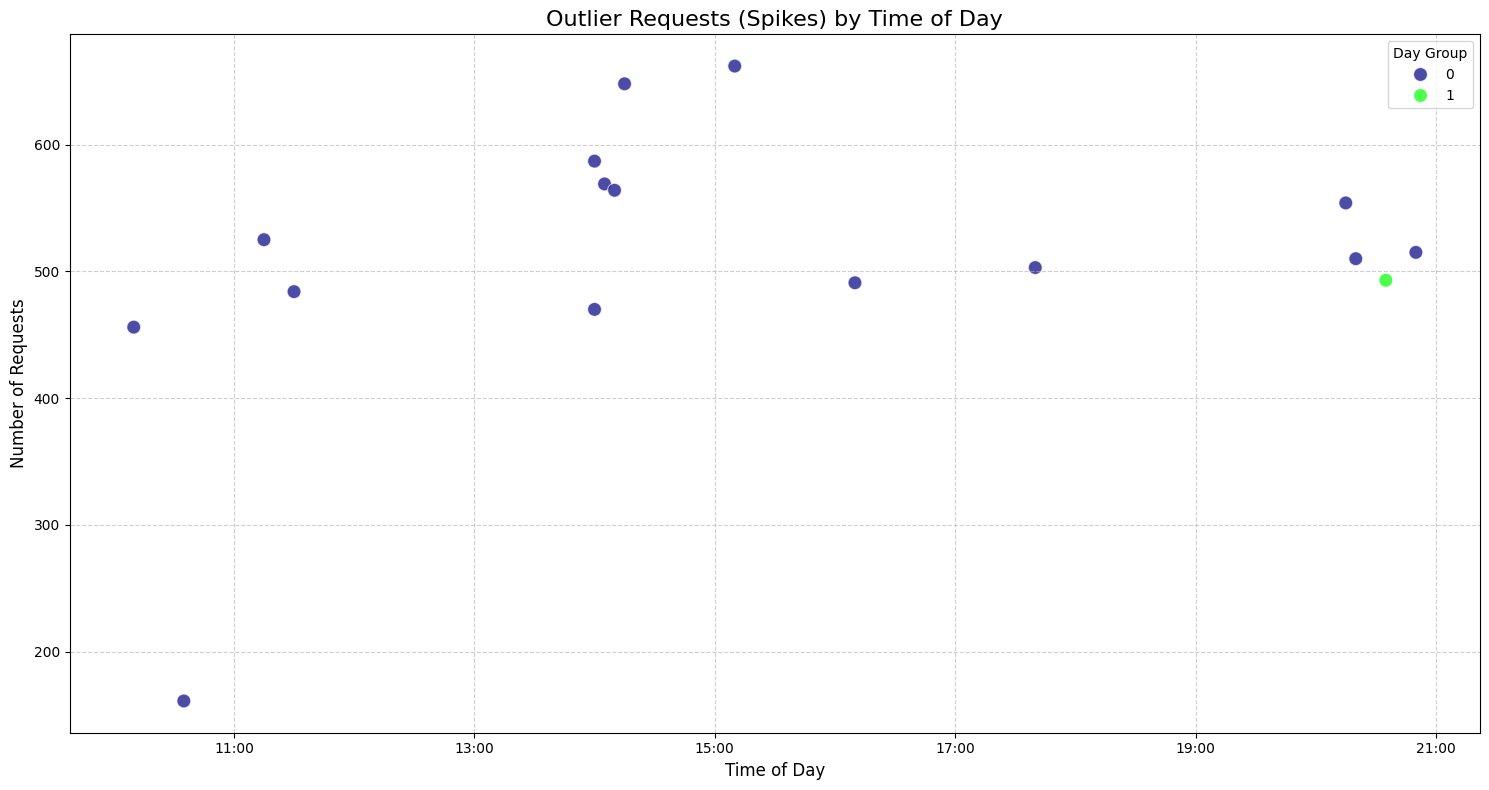

In [99]:
df_pd_outliers = outliers_rolling.to_pandas()

# --- 2. Apply Plotting Fix ---
# Combine time_bin with a dummy date
dummy_date = dt.date(dt.now())
df_pd_outliers['plot_time'] = df_pd_outliers['time_bin'].apply(lambda t: dt.combine(dummy_date, t))

# --- 3. Plotting with Seaborn ---
print("Generating outlier scatterplot...")

plt.figure(figsize=(15, 8))

sns.scatterplot(
    data=df_pd_outliers,
    x="plot_time",
    y="len",
    hue="weekend",    # Color points by 'Mon-Thu' or 'Fri-Sun'
    palette={0: "navy", 1: "lime"}, # Match previous plot
    s=100,              # Set dot size
    alpha=0.7           # Set transparency
)

# --- 4. Customize and Save ---
plt.title('Outlier Requests (Spikes) by Time of Day', fontsize=16)
plt.xlabel('Time of Day', fontsize=12)
plt.ylabel('Number of Requests', fontsize=12)

# Format the x-axis to show time as "HH:MM"
ax = plt.gca()
ax.xaxis.set_major_formatter(mdates.DateFormatter('%H:%M'))
ax.xaxis.set_major_locator(mdates.HourLocator(interval=2))

plt.grid(axis='both', linestyle='--', alpha=0.6)
plt.legend(title='Day Group')

plt.tight_layout()
plt.savefig("outlier_scatterplot.png")

print("Plot saved as 'outlier_scatterplot.png'")
print("Plot saved as 'mon-thu_vs_fri-sun_plot.png'")

In [101]:
outliers_rolling.head()

day,time_bin,len,weekend,baseline
date,time,u32,i32,f64
2020-12-22,15:10:00,662,0,444.5
2020-12-22,14:15:00,648,0,463.0
2020-12-22,14:00:00,587,0,378.5
2020-12-22,14:05:00,569,0,412.5
2020-12-22,14:10:00,564,0,412.5


In [106]:
# 1. Add the 'day' and 'time_bin' columns (this was correct)
df_with_bins = df_cleaned.lazy().with_columns(
    pl.col("timestamp").dt.date().alias("day"),
    pl.col("timestamp").dt.truncate("5m").dt.time().alias("time_bin")
)

# 2. Use .join() with how="semi"
df_outlier_logs = df_with_bins.join(
    outliers_rolling.lazy(),     # This is your filter
    on=["day", "time_bin"],
    how="semi"            # Specify the join type here
).collect() # .collect() executes the query and gives us the final DataFrame

# 3. (Optional) You can drop the temporary 'day' and 'time_bin' columns
df_outlier_logs = df_outlier_logs.drop(["day", "time_bin"])

print(f"Successfully isolated {len(df_outlier_logs):,} original log records from the outlier periods!")
print(df_outlier_logs.head())

Successfully isolated 8,192 original log records from the outlier periods!
shape: (5, 41)
┌─────┬─────┬─────┬─────┬─────┬─────┬─────┬─────┬─────┬─────┬─────┬─────┬─────┬─────┬─────┬─────┬─────┬─────┬─────┬─────┬─────┬─────┬─────┬─────┬─────┬─────┬─────┬─────┬─────┬─────┬─────┬─────┬─────┬─────┬─────┬─────┬─────┬─────┬─────┬─────┬─────┐
│ met ┆ age ┆ log ┆ use ┆ ecs ┆ htt ┆ att ┆ eve ┆ use ┆ sou ┆ sou ┆ sou ┆ age ┆ url ┆ des ┆ use ┆ log ┆ use ┆ htt ┆ ser ┆ des ┆ des ┆ ser ┆ age ┆ age ┆ use ┆ url ┆ sou ┆ htt ┆ tag ┆ use ┆ htt ┆ age ┆ htt ┆ cor ┆ url ┆ use ┆ sou ┆ url ┆ sou ┆ tim │
│ ric ┆ nt. ┆ .of ┆ r_a ┆ .ve ┆ p.r ┆ ack ┆ nt. ┆ r_a ┆ rce ┆ rce ┆ rce ┆ nt. ┆ .co ┆ tin ┆ r_a ┆ .fi ┆ r_a ┆ p.r ┆ vic ┆ tin ┆ tin ┆ vic ┆ nt. ┆ nt. ┆ r_a ┆ .fi ┆ rce ┆ p.r ┆ s   ┆ r_a ┆ p.r ┆ nt. ┆ p.v ┆ rel ┆ .pa ┆ r_a ┆ rce ┆ .or ┆ rce ┆ est │
│ s   ┆ id  ┆ fse ┆ gen ┆ rsi ┆ equ ┆ --- ┆ cre ┆ gen ┆ .as ┆ .re ┆ .ge ┆ hos ┆ ntr ┆ ati ┆ gen ┆ le. ┆ gen ┆ esp ┆ e.t ┆ ati ┆ ati ┆ e.n ┆ ver ┆ nam ┆ gen ┆ let ┆ .d

In [107]:
df_outlier_logs.shape

(8192, 41)

In [109]:
df_outlier_logs["http.request.method"].value_counts()

http.request.method,count
str,u32
"""DELETE""",3
"""GET""",5074
"""PATCH""",191
"""POST""",2491
"""PUT""",123
"""HEAD""",310


In [112]:
df_outlier_logs["agent.hostname"].value_counts()

agent.hostname,count
str,u32
"""5228e58287c4""",985
"""gitlab""",7207


In [124]:
df_outlier_logs.shape

(8192, 40)

In [120]:
df_outlier_logs = df_outlier_logs.drop("agent.id")

In [126]:
ip_counts_by_host = (
    df_outlier_logs.group_by("agent.hostname")
    .agg(
        # This creates a LIST of structs: [{'source.ip': '...', 'count': ...}, ...]
        pl.col("source.ip").value_counts(sort=True).alias("ip_counts")
    )
    .explode("ip_counts") # <-- ADD THIS STEP to turn the list into rows
    .unnest("ip_counts")  # This now flattens the structs
    .sort("agent.hostname", "count", descending=[False, True]) # Sort by new 'count' column
)

ip_counts_by_host.group_by("agent.hostname").head(8)

agent.hostname,source.ip,count
str,str,u32
"""5228e58287c4""","""89.205.138.8""",474
"""5228e58287c4""","""188.103.82.202""",171
"""5228e58287c4""","""212.61.100.37""",158
"""5228e58287c4""","""85.144.30.148""",148
"""5228e58287c4""","""63.143.42.251""",32
"""5228e58287c4""","""198.143.146.34""",2
"""gitlab""","""172.18.0.2""",1786
"""gitlab""","""212.61.100.37""",576
"""gitlab""","""116.203.157.62""",481


In [127]:
median_counts_by_host = (
    ip_counts_by_host.group_by("agent.hostname")
    .agg(
        pl.col("count").median().alias("median_ip_count")
    )
    .sort("median_ip_count", descending=True)
)

print(median_counts_by_host)

shape: (2, 2)
┌────────────────┬─────────────────┐
│ agent.hostname ┆ median_ip_count │
│ ---            ┆ ---             │
│ str            ┆ f64             │
╞════════════════╪═════════════════╡
│ 5228e58287c4   ┆ 153.0           │
│ gitlab         ┆ 8.0             │
└────────────────┴─────────────────┘
